In [36]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [ ]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))

In [37]:
x_train.shape,x_test.shape

((182, 10), (61, 10))

<Axes: >

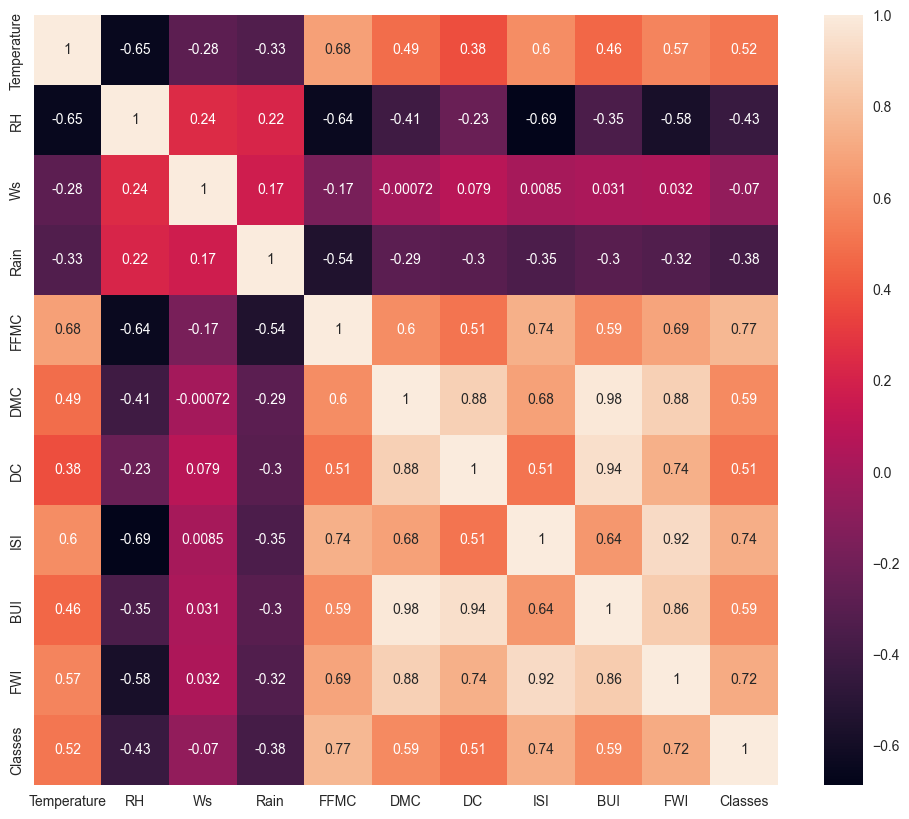

In [40]:
plt.figure(figsize=(12,10))
corr=df_copy.corr()
sns.heatmap(corr,annot=True)

In [41]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])>threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr


In [42]:
corr_features=correlation(df_copy,0.85)

In [43]:
x_train.drop(corr_features,axis=1,inplace=True)
x_test.drop(corr_features,axis=1,inplace=True)
x_train.shape,x_test.shape

((182, 7), (61, 7))

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [50]:
x_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.12805583,
        -0.88272888, -0.62963326],
       [-0.30175842,  0.64950844, -0.59874754, ..., -1.21758569,
        -0.86687565, -0.93058524],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  1.15703067,
         0.61540157,  2.7271388 ],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -2.20933724,
        -1.06504105, -1.06948615],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.73099656,
         0.37760309,  0.5973248 ],
       [-0.57230045,  0.98343651,  2.05910739, ..., -1.33631651,
        -1.01748135, -0.86113478]])

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
linreg=LinearRegression()
linreg.fit(x_train_scaled,y_train)
y_pred=linreg.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error",mae)
print("R2 score",score)

mean abs error 0.2461749167493465
R2 score 0.6487396714492779


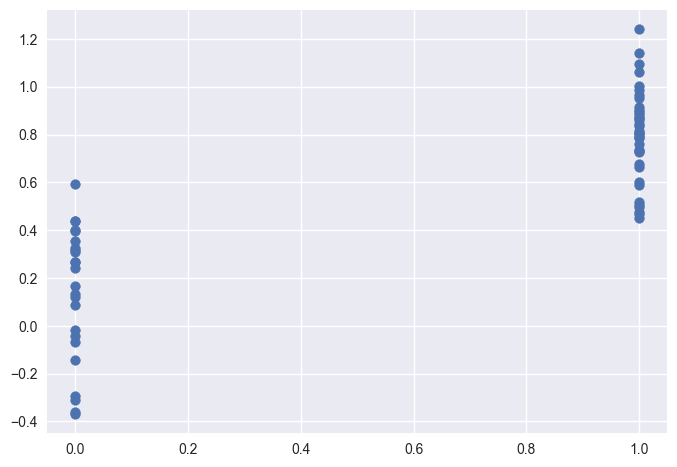

In [53]:
plt.scatter(y_test,y_pred)

lasso regression

In [55]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso=Lasso()
lasso.fit(x_train_scaled,y_train)
y_pred=lasso.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error",mae)
print("R2 score",score)

mean abs error 0.48946135831381726
R2 score -0.01366541339068772


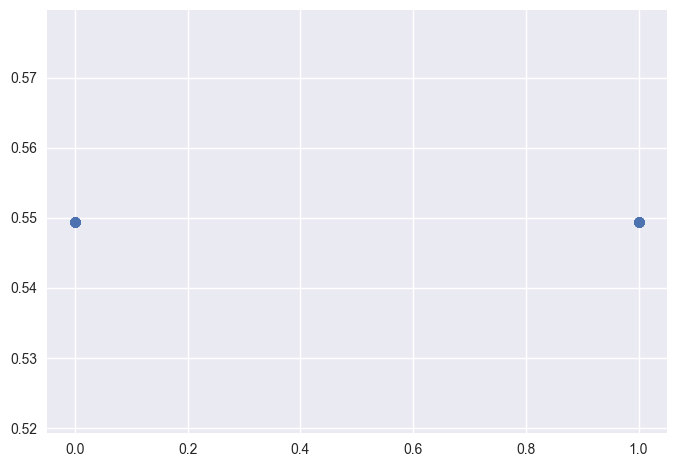

In [58]:
plt.scatter(y_test,y_pred)

Ridge regrresion

In [56]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
ridge=Ridge()
ridge.fit(x_train_scaled,y_train)
y_pred=ridge.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error",mae)
print("R2 score",score)

mean abs error 0.24702929603044277
R2 score 0.6481078556400459


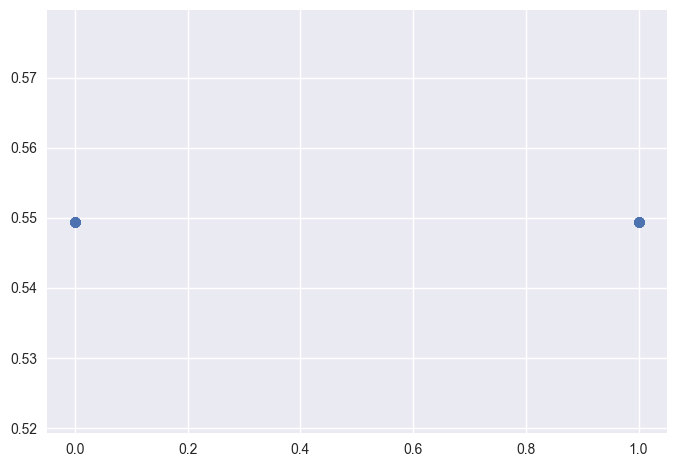

In [60]:
plt.scatter(y_test,y_pred)

elastic regression

In [57]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
elasticnet=ElasticNet()
elasticnet.fit(x_train_scaled,y_train)
y_pred=elasticnet.predict(x_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error",mae)
print("R2 score",score)

mean abs error 0.48946135831381726
R2 score -0.01366541339068772


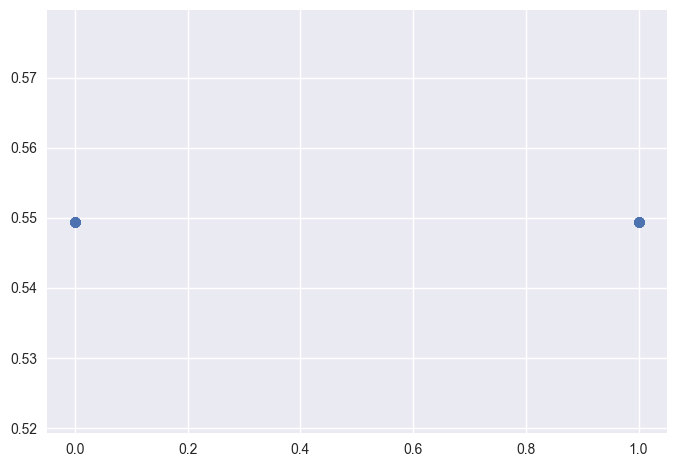

In [59]:
plt.scatter(y_test,y_pred)

hyperparameter tuning

In [62]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV()
ridgecv.fit(x_train_scaled,y_train)

RidgeCV()

mean abs error 0.24702929603044277
R2 score 0.6481078556400459


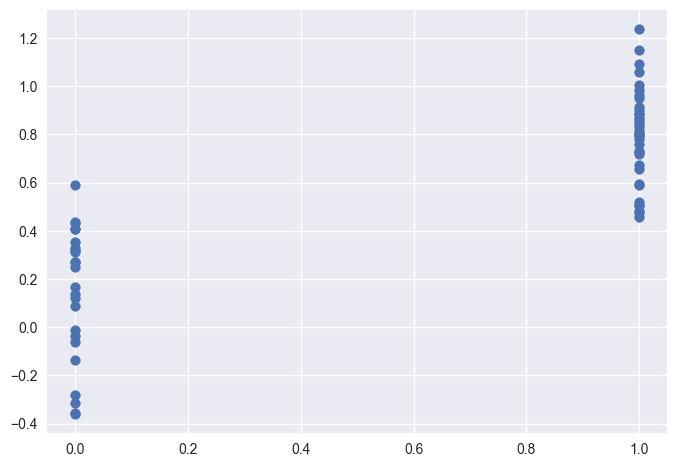

In [64]:
from sklearn.linear_model import RidgeCV
ridgecv=RidgeCV(cv=5)
ridgecv.fit(x_train_scaled,y_train)
y_pred=ridgecv.predict(x_test)
plt.scatter(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print("mean abs error",mae)
print("R2 score",score)

In [70]:
ridgecv.alphas

(0.1, 1.0, 10.0)

pickling

In [71]:
import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))